# TELG1011 - Reporte de Mini-proyecto #1

__Miembros del Grupo:__

Marco Polo Arizala Martinez, (# 201508884)

Juan Matias, (# matricula)

__Fecha: Mes Dia, Año__

## Muestreo a Multiple Tasas (Multirate Sampling)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus [1].

Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia Curae; Nullam velit erat, commodo ut odio eget, pellentesque imperdiet felis. Phasellus in quam ac nulla semper ornare. Morbi porta est ut euismod egestas. Donec ut sagittis nulla, quis iaculis odio. Integer vitae nunc at magna congue pulvinar [2]. Donec sed neque quis magna tincidunt sollicitudin nec in nibh. Nulla tincidunt nulla at nisl tristique accumsan. Phasellus bibendum sem ac nisl aliquet varius. Mauris lacus odio, egestas elementum diam in, fermentum finibus eros. Ut euismod felis sit amet feugiat pulvinar. Sed vehicula placerat ex id tristique [3].


### TAREA 1:  Procesamiento Multi-rate (Multirate Processing)

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus [4].


####  SUBTAREA 1.1: Generacion de la señal

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import scipy.signal as signal
import dspfunc as dsp
import tarea1 as funciones

Populating the interactive namespace from numpy and matplotlib


In [2]:
fs=1000
f1=50
f2=150
ome1=2*f1*np.pi
ome2=2*f2*np.pi
w1=ome1/fs
w2=ome2/fs
n= np.arange(0,10000,1)
x1= 3*np.cos(w1*n)+2*np.cos(w2*n)

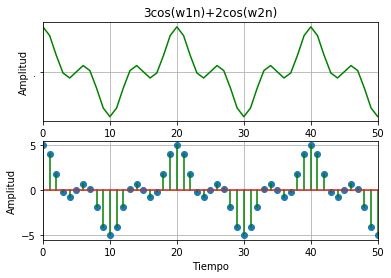

In [3]:
subplot(2,1,1)
plot(n,x1,'g','.')
plt.title('3cos(w1n)+2cos(w2n)')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0,50])
grid()

subplot(2,1,2)
stem(n,x1,'g')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0,50])
grid()

In [4]:
fA, XmagA = funciones.magnitud_espectral(x1,2048,fs)

Text(0,0.5,'Amplitud')

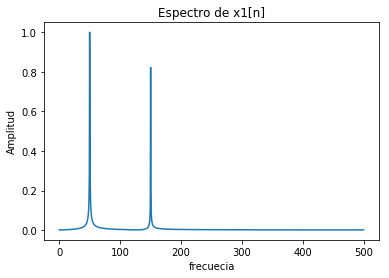

In [5]:
plot(fA,XmagA)
plt.title('Espectro de x1[n]')
plt.xlabel('frecuecia')
plt.ylabel('Amplitud')

* La gráfica muestra el espectro de frecuencia de la señal original, la cual está compuesta por dos señales coseno. Cada pico corresponde a f1 y f2 respectivamente. 
* Existen también picos en el eje x negativo pero son iguales en magnitud a las mostradas en el gráfico.

In [6]:
EspectrodePotenciaxA= 10 * np.log10(XmagA**2)

In [7]:
wfA = 2*fA

Text(0,0.5,'Amplitud')

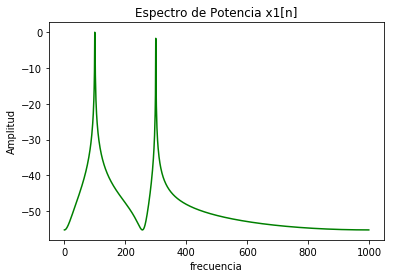

In [8]:
plot(wfA,EspectrodePotenciaxA,'g')
plt.title('Espectro de Potencia x1[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

In [9]:
peaksA = funciones.peak_search(EspectrodePotenciaxA, -80)

In [10]:
fpeaksA = fA[peaksA]
fpeaksA

array([ 49.8046875 , 149.90234375])

In [11]:
wpeaksA = 2*fpeaksA

In [12]:
EspectrodePotenciaxApeaksA = EspectrodePotenciaxA[peaksA]

Text(0,0.5,'Amplitud')

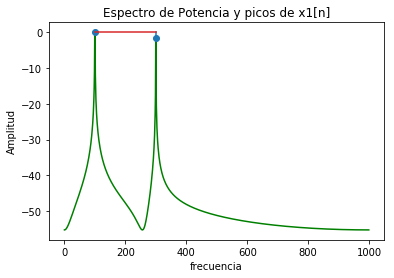

In [13]:
plot(wfA,EspectrodePotenciaxA,'g')
stem(wpeaksA,EspectrodePotenciaxApeaksA)
plt.title('Espectro de Potencia y picos de x1[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

* La energia de la señal se encuentra distrubuida alrededor de las dos frecuencias principales de la señal original.

#### SUBTAREA 1.2: Procesamiento Multirate

Aqui deberan escribir el codigo y los pasos que siguieron.

In [14]:
def downsampling(x,M):
    g = list(x)
    b = []
    
    for i in range(len(g)):
        if not((i+1)%(M+1)==0):
            b.append(g[i])
            
    
    return np.array(b)

In [15]:
M = 2
z1 = downsampling(x1,M)

Text(0,0.5,'Amplitud')

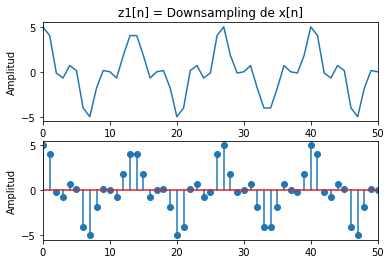

In [16]:
subplot(2,1,1)
plot(z1)
plt.xlim([0,50])
plt.title('z1[n] = Downsampling de x[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

subplot(2,1,2)
stem(z1)
plt.xlim([0,50])
plt.ylabel('Amplitud')

* El número de muestras de la señal es mas pequeño y la gráfica pierde suavidad.

In [17]:
fB, XmagB = funciones.magnitud_espectral(z1,2048,fs/M)

Text(0,0.5,'Amplitud')

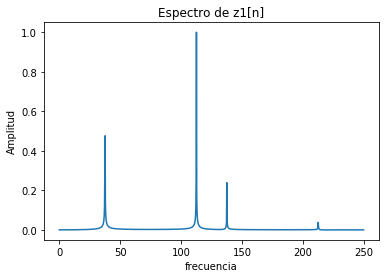

In [18]:
plot(fB,XmagB)
plt.title('Espectro de z1[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

* Se observa a aparición de nuevas frecuencias debido al cambio en la frecuencia de muestreo. Ademas se observa que las frecuencias originales han sufrido un desplazamiento hacia la izquierda.

In [19]:
EspectrodePotenciaxB= 10 * np.log10(XmagB**2)

In [20]:
wfB = 2*fB

Text(0,0.5,'Amplitud')

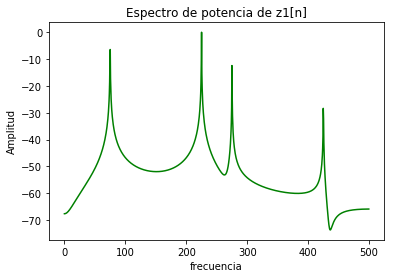

In [21]:
plot(wfB,EspectrodePotenciaxB,'g')
plt.title('Espectro de potencia de z1[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

In [22]:
peaksB = funciones.peak_search(EspectrodePotenciaxB, -80)


In [23]:
fpeaksB= fB[peaksB]


In [24]:
wpeaksB = 2*fpeaksB


In [25]:
EspectrodePotenciaxBpeaksB = EspectrodePotenciaxB[peaksB]


Text(0,0.5,'Amplitud')

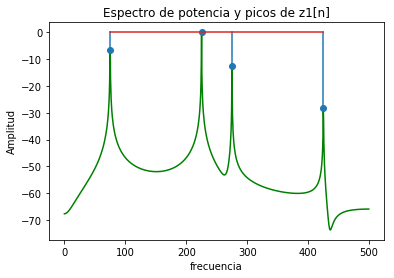

In [26]:
plot(wfB,EspectrodePotenciaxB,'g')
stem(wpeaksB,EspectrodePotenciaxBpeaksB)
plt.title('Espectro de potencia y picos de z1[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

* Las apariciones de las nuevas frecuencias implica la redistribucion de la energia de la señal.

In [27]:
def upsampling(x,M):
    X = list(x)
    A=[]
    B=[]    
    i=1
    done = True
    for indice in range(len(X)):
        ESTART=indice*M
        FIN=(indice+1)*M
        A = A+X[ESTART:FIN]+[0]
    
    while done:
        if A[-i]>0:
            B=A[:-i+1]
            done=False
        else:
            i=i+1
             
    return np.array(B)


In [28]:
L = 4
z2 = upsampling(z1,L)

Text(0,0.5,'Amplitud')

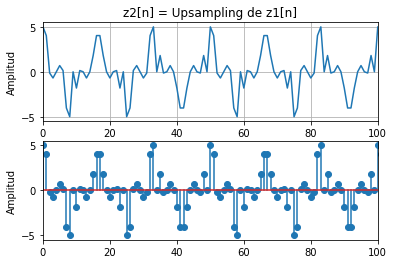

In [29]:
subplot(2,1,1)
plot(z2)
plt.xlim([0,100])
plt.title('z2[n] = Upsampling de z1[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')
grid()

subplot(2,1,2)
stem(z2)
plt.xlim([0,100])
plt.ylabel('Amplitud')

* Los ceros agregados en el upsampling provoca aun mas perdida de  suavidad en comparacion con z1.

In [30]:
fC, XmagC = funciones.magnitud_espectral(z2,2048,fs*L/M)

Text(0,0.5,'Amplitud')

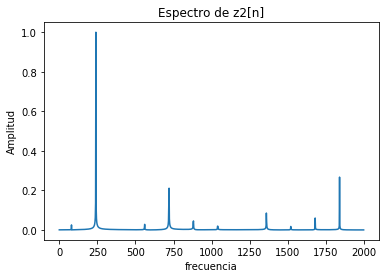

In [31]:
plot(2*fC,XmagC)
plt.title('Espectro de z2[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

* Aparecen mas frecuencias y la tasa de muestreo se duplicó en comparacion con la tasa inicial.

In [32]:
EspectrodePotenciaxC= 10 * np.log10(XmagC**2)

In [33]:
wfC = 2*fC

Text(0,0.5,'Amplitud')

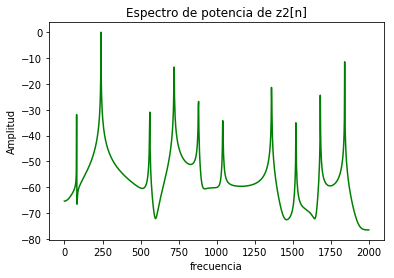

In [34]:
plot(wfC,EspectrodePotenciaxC,'g')
plt.title('Espectro de potencia de z2[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

In [35]:
peaksC = funciones.peak_search(EspectrodePotenciaxC, -80)

In [36]:
fpeaksC= fC[peaksC]

In [37]:
wpeaksC = 2*fpeaksC

In [38]:
EspectrodePotenciaxCpeaksC = EspectrodePotenciaxC[peaksC]


Text(0,0.5,'Amplitud')

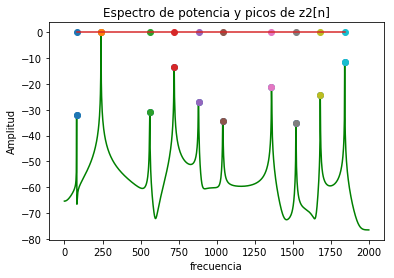

In [39]:
plot(wfC,EspectrodePotenciaxC,'g')
stem(wpeaksC,EspectrodePotenciaxCpeaksC,'o')
plt.title('Espectro de potencia y picos de z2[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

* Los picos se encuentran distribuidos de manera mas uniforme a lo largo del primer ciclo de la señal.

In [40]:
numtaps = 65
fc = 0.2*fs
cutoff=2*fc/fs
b = signal.firwin(numtaps,cutoff)

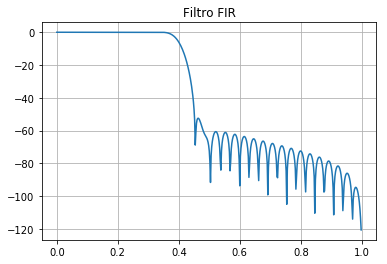

In [41]:
f1 = np.arange(0,0.5,0.001)
W,H = signal.freqz(b,1,2*np.pi*f1)
plt.plot(W/np.pi,20*np.log10(np.abs(H)))
plt.title('Filtro FIR')
plt.grid();

In [42]:
y = signal.lfilter(b,1,z2)

C:\Users\Core I3\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


Text(0,0.5,'frecuencia')

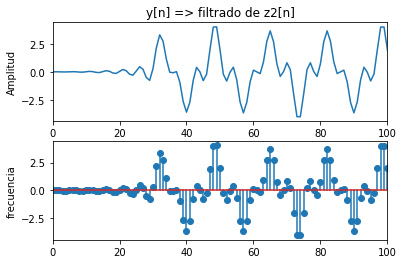

In [54]:
subplot(2,1,1)
plot(y)
plt.xlim([0,100])
plt.title('y[n] => filtrado de z2[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

subplot(2,1,2)
stem(y)
plt.xlim([0,100])
plt.ylabel('frecuencia')

* La señal y(n) se observa disminuida en amplitud en comparacion con la señal original y presenta anulacion de señal aproximadamente en las primeras 20 muestras.
* La forma de onda de la señal y(n) es aproximada a la señal x1(n) pero con compresion y desplazamiento en el tiempo. 

In [44]:
fD, XmagD = funciones.magnitud_espectral(y,2048,fs*L/M)

Text(0,0.5,'Amplitud')

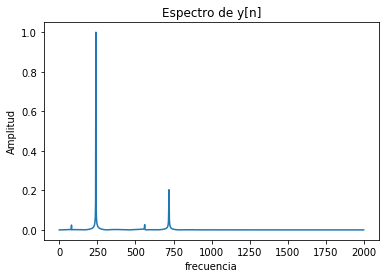

In [45]:
plot(2*fD,XmagD)
plt.title('Espectro de y[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

In [46]:
EspectrodePotenciaxD= 10 * np.log10(XmagD**2)

In [47]:
wfD = 2*fD

Text(0,0.5,'Amplitud')

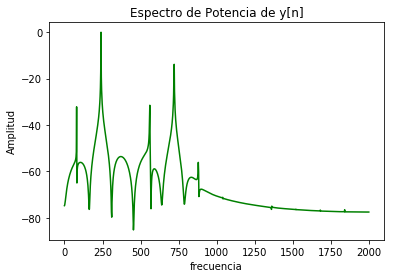

In [48]:
plot(wfD,EspectrodePotenciaxD,'g')
plt.title('Espectro de Potencia de y[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

In [49]:
peaksD = funciones.peak_search(EspectrodePotenciaxD, -80)

In [50]:
fpeaksD= fD[peaksD]

In [51]:
wpeaksD = 2*fpeaksD

In [52]:
EspectrodePotenciaxDpeaksD = EspectrodePotenciaxD[peaksD]


Text(0,0.5,'Amplitud')

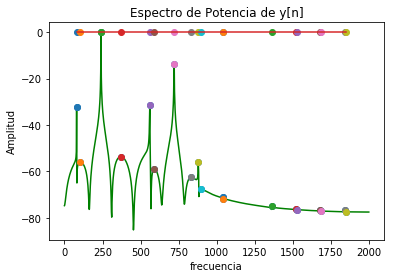

In [53]:
plot(wfD,EspectrodePotenciaxD,'g')
stem(wpeaksD,EspectrodePotenciaxDpeaksD,'o')
plt.title('Espectro de Potencia de y[n]')
plt.xlabel('frecuencia')
plt.ylabel('Amplitud')

* Se observa que la energia se encuentra distribuida desde o hasta aproximadamente 1000, lo que corresponde a la frecuencia de muestreo original.
* Los picos del espectro de potencia vuelven a aparecer adicionalmente con picos anteriormente ocultos.

### TAREA 2: Diseño de Experimento

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus.


#### Paso 1: Identificacion del problema

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus.

#### Paso 2: Plantear solucion y resultados esperados

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus.

#### Paso 3: Identificar variable, rango de resultados y modelos#### 

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus.

#### Paso 4: Algoritmo a utilizar, procedimiento y variacion de parametros

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus.

#### Paso 5: Escribir una tentativa de hipotesis

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Mauris accumsan velit nunc. Nulla sed turpis arcu. Suspendisse justo quam, laoreet ac cursus scelerisque, sodales sit amet arcu. Phasellus placerat sagittis pulvinar. Nunc pulvinar vehicula dui. Ut molestie leo quis orci porttitor, ullamcorper mattis leo venenatis. Sed malesuada varius risus.

## Conclusiones

Deben ser un sumario de las observaciones y resultados alcanzados. No incluir impresiones u opiniones personales y fuera de contexto de la practica.

## Referencias

[1] J. K. Author, “Titulo del Capítulo” en el Título del libro, xth ed. Ciudad de Empresa Editorial, País o Estado si no se tiene ciudad: Editorial, año, pp. xxx-xxx.

[2] J. K. Author, “Titulo del artículo,” Titulo de Revista abreviado, vol. x, no. x, pp. xxx-xxx, Mes, año.

[3] J. K. Author, “Titulo de tesis,” Tesis de Maestría, Abrev. Departamento o Facultad, Abrev. Universidad, Ciudad, País o estado, año.

[4] J. K. Author, “Titulo del artículo,” en Nombre de conferencia, ciudad, Estado o País, año, pp. xxx-xxx.

[5] J. K. Author, “Titulo del reporte,” Abrev. Nombre de la Compañía., Ciudad, Estado o País, Rep. xxx, año.

[6] J. K. Author. (año, mes día). Titulo (edición) [Tipo de medio]. Disponible en: http://www.(URL)